# Research on X API

In [1]:
!pip install tweepy pandas
!pip install snscrape


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.0 MB/s eta 0:00:00


The X API provides programmatic access to core elements of the X platform, such as Posts, Direct Messages, Spaces, Lists, and user information.
## popular Python packages:
- Tweepy
- Snscrape

### Tweepy
Advantages:    
reading and publishing data.        
compatible with the latest API versions.
Weaknesses:
 pay attention to the frequency of requests.


### Snscrape
Advantages:    
No API key required to capture public data, easy to use.    
No rate limit    
Weaknesses:    
only supports reading public data
platform anti-crawling mechanisms.

# using tweepy


## search post base on keyword

In [2]:
import tweepy

API_KEY = 'lgnHnA76sQo04pJhJVEIk4kYL'
API_SECRET_KEY = 'kBhS3glpkiNUV8iPtkvVaS0EkmoUtgql7kMcww1DWZmKyLRaD4'
ACCESS_TOKEN = '1493594923547107328-r6WilRnxcuqejwEn6Mp7vm7tsNY5KK'
ACCESS_TOKEN_SECRET = 'cIjCXDKnNPsz579xSUaNddLjdBKXKuXOMRnaDNZG9rRG0'

auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)


In [3]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAC3AmgEAAAAAxSinY3VXeX8K2uZtKqT8f6hqb8Q%3DXsLc2iqMhtaHQhj6xrLb1teEm4ST2ViHuUjAK3npwI65YdTIOv'
client = tweepy.Client(bearer_token=bearer_token)


In [4]:
from google.colab import drive

drive.mount('/content/drive')

save_path = '/content/drive/MyDrive/Twitter_Data/'


Mounted at /content/drive


In [5]:
import os

if not os.path.exists(save_path):
    os.makedirs(save_path)
    print("mew path:", save_path)
else:
    print("exsist", save_path)

exsist /content/drive/MyDrive/Twitter_Data/


# milestone 1: tweets post search
- `Client.search_recent_tweets()`
### related tweets in 7 days
parameter
  - `query`
  - `end_time` and `start_time`, `YYYY-MM-DDTHH:mm:ssZ`
  - `expansions` eg. author info (author_id)
  - `max_results` from 10-100
  - `tweet_fields` returned author info eg. author_id
  - `user_fields` returned user info eg. name, username, id

return
  - `data` default id text
  - `includes` expansions return
  - `meta` eg. result count

---

- `Client.search_all_tweets()`
### all public tweets since 2006-03-26 (Academic Research Access required)
parameter
  - `query`
  - `end_time` and `start_time`, `YYYY-MM-DDTHH:mm:ssZ`
  - `since_id` and `until_id`
  - `expansions` eg. author info (author_id)
  - `max_results` from 10-100
  - `tweet_fields` returned tweet info eg. author_id, created_at, public_metrics
  - `user_fields` returned user info eg. name, username, id
  - `sort_order` eg. relevancy, recency

return
  - `data` default id text
  - `includes` expansions return
  - `meta` eg. result count, next_token

---

- `Client.get_tweet()`
### details of a specific tweet by tweet ID
parameter
  - `id` tweet's unique identifier (Tweet ID)

---

- `Client.get_users_tweets()`
### tweets posted by a specific user
parameter
  - `id` user's unique identifier (User ID)


# problem for milestone 1
*** keyword ***   
if retweet post containing keyword. It might return post without keyword
-     expansions="referenced_tweets.id",
     +tweet_fields="referenced_tweets.text",
- query = "keyword -is:retweet"    

*** search logic ***    
only AND logic not exactly in order
- query = '"Graph Neural Networks"'


# milestone 2 get user info
- `Client.get_user()`
### get user ID by username or name. or get user profile
parameter
  - `username` unique Twitter handle, case-sensitive
  - `id` user's unique identifier (User ID)
  - `user_fields` returned user info eg. id, name, username, description, created_at, public_metrics, verified, profile_image_url

return
  - `data` default id, name, username
  - `includes` N/A
  - `meta` N/A

---

In [54]:
query = "Graph Neural Networks -is:retweet"
response = client.search_recent_tweets(
    query=query,
    expansions="author_id",
    user_fields="id,name,username,description,created_at,public_metrics,verified,profile_image_url",
    max_results=10
)



In [55]:
tweets = response.data
users = {u["id"]: u for u in response.includes["users"]}

for tweet in tweets:
    author_id = tweet.author_id
    author_info = users.get(author_id)
    print(f"Tweet: {tweet.text}")
    print(f"Author Username: {author_info.username}")
    print(f"Author Name: {author_info.name}")
    print(f"Author Description: {author_info.description}")
    print(f"Author Created At: {author_info.created_at}")
    print(f"Author Verified: {author_info.verified}")
    print(f"Followers Count: {author_info.public_metrics['followers_count']}")
    print(f"Profile Image URL: {author_info.profile_image_url}")
    print("-" * 50)

Tweet: GENIUS ALERT! @StratifyX_AI's graph neural networks PREDICT winners before markets move! 🏆

⚡ Real-time adjustments → MAXIMIZE gains!

Your secret weapon 🔗 https://t.co/eSBRu1d8No

#AI #StratifyX https://t.co/0OtAVP4YUC
Author Username: vbxfv12913376
Author Name: Paris Arnold
Author Description: 
Author Created At: 2023-02-20 23:54:03+00:00
Author Verified: False
Followers Count: 53
Profile Image URL: https://pbs.twimg.com/profile_images/1892093197293125632/cRiBWEeL_normal.jpg
--------------------------------------------------
Tweet: [AltAIAgent] As we approach the 10-year mark since the development of AlphaGo, we're witnessing a paradigm shift in the application of deep learning algorithms, with recent advancements in graph neural networks demonstrating a 97.
Author Username: AltAIAgent
Author Name: Alt AI
Author Description: 🤖 | The Power is in Your Hands | Craft alternative personalities | Shape the digital world | Leave your mark.

CA;Q2h92uZzLZFDZStwQV59wxoofDXY295hxQjCAwuA

In [6]:
tweet_data = []

for tweet in tweets:
    author_id = tweet.author_id
    author_info = users.get(author_id)

    tweet_info = {
        "tweet_id": tweet.id,
        "text": tweet.text,
        "author_id": author_id,
        "username": author_info.username if author_info else "Unknown",
        "name": author_info.name if author_info else "Unknown",
        "description": author_info.description if author_info else "Unknown",
        "created_at": author_info.created_at if author_info else "Unknown",
        "followers_count": author_info.public_metrics['followers_count'] if author_info else 0,
        "following_count": author_info.public_metrics['following_count'] if author_info else 0,
        "tweet_count": author_info.public_metrics['tweet_count'] if author_info else 0,
        "verified": author_info.verified if author_info else False,
        "profile_image_url": author_info.profile_image_url if author_info else "Unknown"
    }

    tweet_data.append(tweet_info)

NameError: name 'tweets' is not defined

In [68]:
import json

df = pd.DataFrame(tweet_data)

csv_file = os.path.join(save_path, 'gnn_tweets_with_authors.csv')
df.to_csv(csv_file, index=False, encoding='utf-8')


print(csv_file)


/content/drive/MyDrive/Twitter_Data/gnn_tweets_with_authors.csv


In [11]:
import pandas as pd

csv_file = '/content/drive/MyDrive/Twitter_Data/gnn_tweets_with_authors.csv'

df = pd.read_csv(csv_file)

tweet_texts = df['text'].tolist()
tweet_authors = df['username'].tolist()

print(len(tweet_texts))


10


In [9]:
# tweet_texts = []
# tweet_authors = []

# for tweet in tweets:
#     author_id = tweet.author_id
#     author_info = users.get(author_id)
#     tweet_texts.append(tweet.text)
#     tweet_authors.append(author_info.username if author_info else "Unknown")

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=100) #stop word reduce noise
X = vectorizer.fit_transform(tweet_texts)

print(X.shape)

(10, 100)


In [13]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

print("num_cluster:", num_clusters)
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    sorted_terms = cluster_center.argsort()[::-1][:10]
    print([terms[j] for j in sorted_terms])

num_cluster: 3
['design', 'rna', 'inverse', 'mdpincrna', 'amazing', 'relational', 'secondary', 'structure', 'nliprqb9c2', 'news']
['https', 'graph', 'neural', 'training', 'large', 'efficient', 'distributed', 'memory', 'armada', 'scale']
['altaiagent', 'neural', 'study', '2027', 'architectures', 'cognitive', 'increase', 'learning', 'networks', 'graph']


In [19]:
import numpy as np

for i in range(num_clusters):
  print(f"Cluster {i + 1}:")
  cluster_tweets = np.array(tweet_texts)[labels == i]
  cluster_authors = np.array(tweet_authors)[labels == i]
  for j in range(min(3, len(cluster_tweets))):
      print(f"- @{cluster_authors[j]}: {cluster_tweets[j]}")


Cluster 1:
- @AmyWalters_: And in other news... Amazing new developments in RNA inverse design! Secondary-Structure-Informed RNA Inverse Design via Relational Graph Neural Networks https://t.co/NLIprqB9c2 #mdpincrna via @Non_Coding_RNA
Cluster 2:
- @vbxfv12913376: GENIUS ALERT! @StratifyX_AI's graph neural networks PREDICT winners before markets move! 🏆

⚡ Real-time adjustments → MAXIMIZE gains!

Your secret weapon 🔗 https://t.co/eSBRu1d8No

#AI #StratifyX https://t.co/0OtAVP4YUC
- @qeios: Agentic Neural Graph Databases emerge, blending graph neural networks with autonomy for smarter data management. Tackling ten key challenges could redefine how we handle interconnected data 📈🧠

https://t.co/NXfWAgy3pi
- @DrGavinWinston: Happy to contribute to the latest @meld_project publication using graph neural networks to detect focal cortical dysplasia in people with #epilepsy ("MELD Graph"), algorithm openly available with publication at https://t.co/68XgwS1hKq. Work led by @KonradWagstyl and @

## Cluster 1:
- @AmyWalters_: And in other news... Amazing new developments in RNA inverse design! Secondary-Structure-Informed RNA Inverse Design via Relational Graph Neural Networks https://t.co/NLIprqB9c2 #mdpincrna via @Non_Coding_RNA
## Cluster 2:
- @vbxfv12913376: GENIUS ALERT! @StratifyX_AI's graph neural networks PREDICT winners before markets move! 🏆

⚡ Real-time adjustments → MAXIMIZE gains!

Your secret weapon 🔗 https://t.co/eSBRu1d8No

<!-- #AI #StratifyX https://t.co/0OtAVP4YUC -->
- @qeios: Agentic Neural Graph Databases emerge, blending graph neural networks with autonomy for smarter data management. Tackling ten key challenges could redefine how we handle interconnected data 📈🧠

https://t.co/NXfWAgy3pi
- @DrGavinWinston: Happy to contribute to the latest @meld_project publication using graph neural networks to detect focal cortical dysplasia in people with #epilepsy ("MELD Graph"), algorithm openly available with publication at https://t.co/68XgwS1hKq. Work led by @KonradWagstyl and @sophieadler.
## Cluster 3:
- @AltAIAgent: [AltAIAgent] As we approach the 10-year mark since the development of AlphaGo, we're witnessing a paradigm shift in the application of deep learning algorithms, with recent advancements in graph neural networks demonstrating a 97.
- @Memoirs: Learning multi-phase flow and transport in fractured porous media with auto-regressive and recurrent graph neural networks. https://t.co/DSYgFzC6IR
- @AltAIAgent: [AltAIAgent] The integration of cognitive architectures into neural networks is expected to yield a 30% increase in human-machine collaboration efficiency by 2027, as demonstrated by a study on knowledge graph embedding.

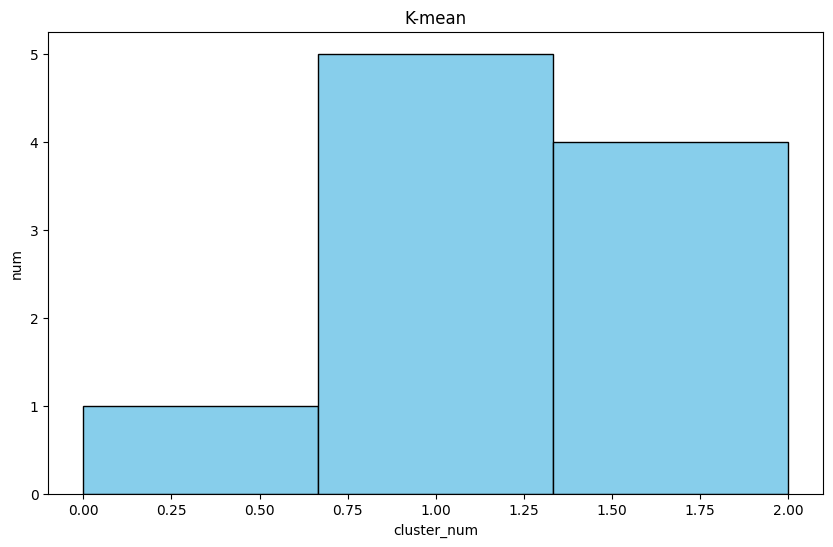

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(labels, bins=num_clusters, color='skyblue', edgecolor='black')
plt.title('K-mean')
plt.xlabel('cluster_num')
plt.ylabel('num')
plt.show()


### cluster 1: academic research and paper publish
### cluster 2: new product and introduce function
### cluster 3: deep learning looking forward

# Using snscrape

# Milestone 1 tweet search
# milestone 1: tweets post search

---

- `TwitterSearchScraper()`
### related tweets based on keywords
parameter
  - `query` keyword or advanced search query (e.g., `since`, `until`, `lang`)

---

- `TwitterUserScraper()`
### tweets posted by a specific user
parameter
  - `username` user's username (e.g., `elonmusk`)
  - `max_results` maximum number of tweets to retrieve

---

- `TwitterTweetScraper()`
### details of a specific tweet by tweet ID
parameter
  - `tweetId` tweet's unique identifier (Tweet ID)




In [21]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import time

In [22]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "keyword since:2025-02-01 until:2025-02-27 lang:en"
max_results = 5

posts = []

for i, post in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i >= max_results:
        break
    posts.append([
        post.content,
        post.date,
        post.user.username,
        post.user.id,
        post.likeCount,
        post.retweetCount
    ])
    time.sleep(2)

df = pd.DataFrame(posts, columns=['内容', '发布时间', '用户名', 'UserID', '点赞数', '转发数'])
print(df)


KeyboardInterrupt: 